# $(1+\lambda)$-CMA-ES
In this notebook we aim to partially replicate (only results from $(1+\lambda)$-CMA-ES) Figure 1 (p. 8) from [1]

**References**

[1] C. Igel, N. Hansen, and S. Roth. Covariance matrix adaptation for multi-objective optimization. Evolutionary Computation, 15(1):1–28, 2007. doi:10.1162/evco.2007.15.1.1.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dataclasses

import numpy as np

from anguilla.fitness.benchmark import Sphere, Ellipsoid, Rastrigin
from experiment import run_experiment, plot_experiment, ExperimentConfiguration

In [3]:
# Benchmark functions
fns = {}
fns['sphere'] = lambda n, rng: Sphere(n, rng=rng)
fns['ellipsoid'] = lambda n, rng: Ellipsoid(n, alpha=1000.0, rng=rng) 
fns['rastrigin'] = lambda n, rng: Rastrigin(n, rng=rng)

# Configuration
config = {}
config['5'] = ExperimentConfiguration(n_dimensions=5, ns_offspring=[1, 8],
                                      initial_region=(-1.0, 5.0), initial_step_size=1e-4,
                                      n_trials=51, max_evaluations=1500, target_fitness=1e-9)
config['20'] = ExperimentConfiguration(n_dimensions=20, ns_offspring=[1, 12],
                                      initial_region=(-1.0, 5.0), initial_step_size=1e-4,
                                      n_trials=51, max_evaluations=5000, target_fitness=1e-9)
# Results
results = {}

## Sphere

In [4]:
results['sphere-5'] = run_experiment(fns['sphere'], config['5'])

In [5]:
results['sphere-20'] = run_experiment(fns['sphere'], config['20'])

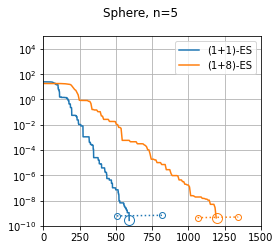

In [6]:
fig = plot_experiment(results['sphere-5'],
                      xticks=np.arange(0, 2000, 500),
                      yticks=10.0 ** np.array([-10, -5, 0, 5]))

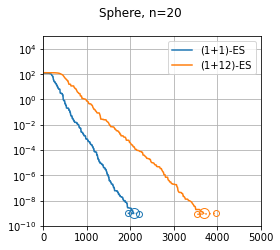

In [7]:
fig = plot_experiment(results['sphere-20'],
                      xticks=np.arange(0, 6000, 1000),
                     yticks=10.0 ** np.array([-10, -5, 0, 5]))

## Ellipsoid

In [8]:
custom_config = dataclasses.replace(config['5'], max_evaluations=3500)
results['ellipsoid-5'] = run_experiment(fns['ellipsoid'], custom_config)

In [9]:
custom_config = dataclasses.replace(config['20'], max_evaluations=35000)
results['ellipsoid-20'] = run_experiment(fns['ellipsoid'], custom_config)

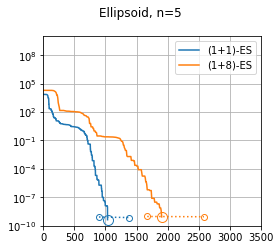

In [10]:
fig = plot_experiment(results['ellipsoid-5'],
                      xticks=np.arange(0, 4000, 500),
                      yticks=10.0 ** np.array([-10, -5, 0, 5, 10]))

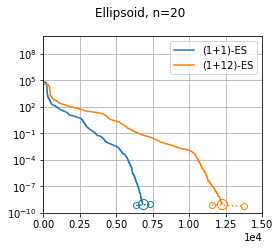

In [11]:
fig = plot_experiment(results['ellipsoid-20'],
                      xticks=np.arange(0, 20000, 5000),
                      yticks=10.0 ** np.array([-10, -5, 0, 5, 10]),
                      )

## Rastrigin

In [12]:
custom_config = dataclasses.replace(config['5'], max_evaluations=1000)
results['rastrigin-5'] = run_experiment(fns['rastrigin'], custom_config)

In [13]:
custom_config = dataclasses.replace(config['20'], max_evaluations=8000)
results['rastrigin-20'] = run_experiment(fns['rastrigin'], custom_config)

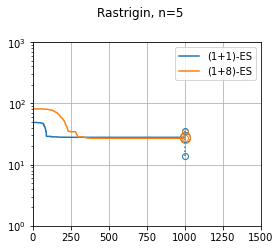

In [14]:
fig = plot_experiment(results['rastrigin-5'],
                      xticks=np.arange(0, 2000, 500),
                      yticks=10.0 ** np.array([0, 1, 2, 3]))

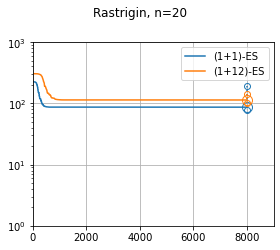

In [15]:
fig = plot_experiment(results['rastrigin-20'],
                      xticks=np.arange(0, 10000, 1000),
                      yticks=10.0 ** np.array([0, 1, 2, 3]))